In [1]:
pip install statsmodels

Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install yfinance

Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 102 kB 6.2 MB/s ta 0:00:011
     |████████████████████████████████| 112 kB 8.6 MB/s eta 0:00:01
     |████████████████████████████████| 8.1 MB 3.4 MB/s eta 0:00:01
     |████████████████████████████████| 948 kB 4.7 MB/s eta 0:00:01
  distutils: /private/var/folders/t8/98kc315d6592z5nmcq76rt9h0000gn/T/pip-build-env-vis8khdw/normal/lib/python3.9/site-packages
  sysconfig: /Library/Python/3.9/site-packages
  distutils: /private/var/folders/t8/98kc315d6592z5nmcq76rt9h0000gn/T/pip-build-env-vis8khdw/normal/lib/python3.9/site-packages
  sysconfig: /Library/Python/3.9/site-packages
  user = False
  home = None
  root = None
  prefix = '/private/var/folders/t8/98kc315d6592z5nmcq76rt9h0000gn/T/pip-build-env-vis8khdw/normal'
  distutils: /private/var/folders/t8/98kc315d6592z5nmcq76rt9h0000gn/T/pip-build-env-vis8khdw/overlay/lib/python3.9/site-packages
  sysconfig: /Library/Python

In [3]:
import yfinance as yf
import pandas as pd
import numpy as np
from statsmodels.tsa.arima.model import ARIMA


In [4]:
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

In [5]:
stock = 'AAPL'
df = yf.download(stock, start='2018-01-01', end='2024-11-27')

[*********************100%***********************]  1 of 1 completed


In [6]:
df

Price,Adj Close,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,,
2018-01-02,40.524345,43.064999,43.075001,42.314999,42.540001,102223600
2018-01-03,40.517292,43.057499,43.637501,42.990002,43.132500,118071600
2018-01-04,40.705486,43.257500,43.367500,43.020000,43.134998,89738400
2018-01-05,41.168922,43.750000,43.842499,43.262501,43.360001,94640000
2018-01-08,41.016022,43.587502,43.902500,43.482498,43.587502,82271200
...,...,...,...,...,...,...
2024-11-20,229.000000,229.000000,229.929993,225.889999,228.059998,35169600
2024-11-21,228.520004,228.520004,230.160004,225.710007,228.880005,42108300


In [7]:
df = df[['Adj Close']]

In [8]:
df

Price,Adj Close
Ticker,AAPL
Date,
2018-01-02,40.524345
2018-01-03,40.517292
2018-01-04,40.705486
2018-01-05,41.168922
2018-01-08,41.016022
...,...
2024-11-20,229.000000
2024-11-21,228.520004


In [9]:
df.index.dtype

dtype('<M8[ns]')

In [10]:
df.index = pd.to_datetime(df.index)

In [11]:
df.index.dtype

dtype('<M8[ns]')

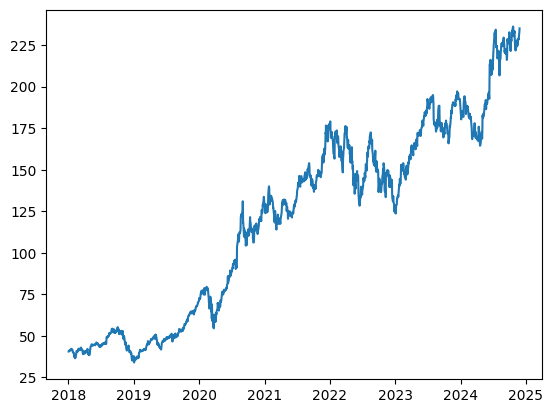

In [12]:
plt.plot(df)

In [13]:
result = adfuller(df['Adj Close'])


In [14]:
result[0]

-0.22225694730796017

In [15]:
result[1]

0.9358161246639792

In [16]:
print(np.var(df['Adj Close']))
print(np.std(df['Adj Close']))
print(np.mean(df['Adj Close']))

Ticker
AAPL    3358.670226
dtype: float64
Ticker
AAPL    57.954035
dtype: float64
120.73701542019158


/Users/sam/Library/Python/3.9/lib/python/site-packages/numpy/core/fromnumeric.py:3785: FutureWarning: The behavior of DataFrame.var with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return var(axis=axis, dtype=dtype, out=out, ddof=ddof, **kwargs)
/Users/sam/Library/Python/3.9/lib/python/site-packages/numpy/core/fromnumeric.py:3643: FutureWarning: The behavior of DataFrame.std with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return std(axis=axis, dtype=dtype, out=out, ddof=ddof, **kwargs)


(array([437., 124.,  85.,  62., 201., 268., 247., 191.,  22., 101.]),
 array([ 33.95254517,  54.17930145,  74.40605774,  94.63281403,
        114.85957031, 135.0863266 , 155.31308289, 175.53983917,
        195.76659546, 215.99335175, 236.22010803]),
 <BarContainer object of 10 artists>)

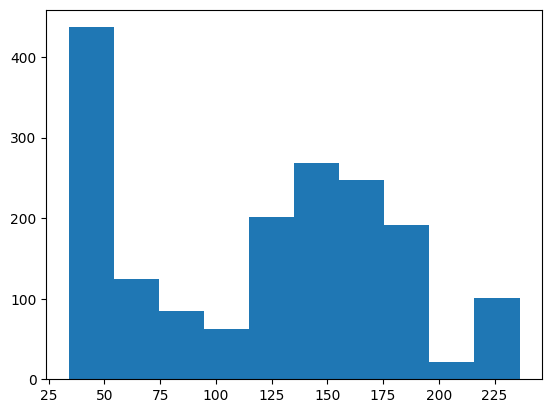

In [17]:
plt.hist(df['Adj Close'])

In [18]:
df['price_diff'] = df['Adj Close'].shift()

/var/folders/t8/98kc315d6592z5nmcq76rt9h0000gn/T/ipykernel_15580/3345605203.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['price_diff'] = df['Adj Close'].shift()


In [19]:
df

Price,Adj Close,price_diff
Ticker,AAPL,
Date,,
2018-01-02,40.524345,NaN
2018-01-03,40.517292,40.524345
2018-01-04,40.705486,40.517292
2018-01-05,41.168922,40.705486
2018-01-08,41.016022,41.168922
...,...,...
2024-11-20,229.000000,228.279999
2024-11-21,228.520004,229.000000


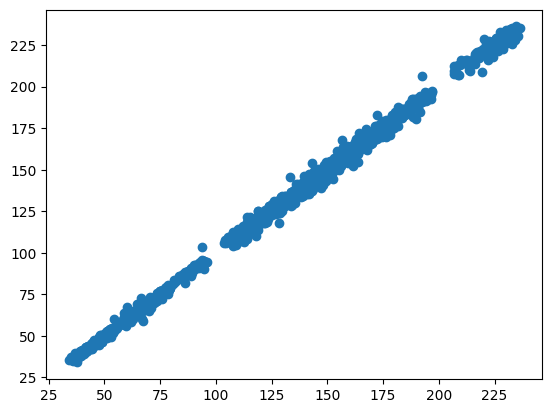

In [20]:
plt.scatter(df['price_diff'],df['Adj Close'])

In [21]:
df['t-2'] = df['Adj Close'].shift(2)

/var/folders/t8/98kc315d6592z5nmcq76rt9h0000gn/T/ipykernel_15580/531317907.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['t-2'] = df['Adj Close'].shift(2)


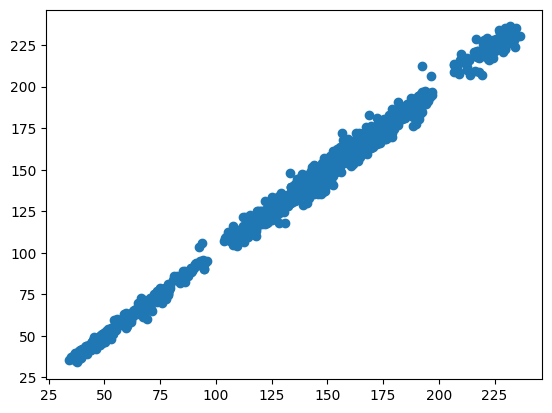

In [22]:
plt.scatter(df['t-2'], df['Adj Close'])

In [23]:
df['t-50'] = df['Adj Close'].shift(50)

/var/folders/t8/98kc315d6592z5nmcq76rt9h0000gn/T/ipykernel_15580/3545965860.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['t-50'] = df['Adj Close'].shift(50)


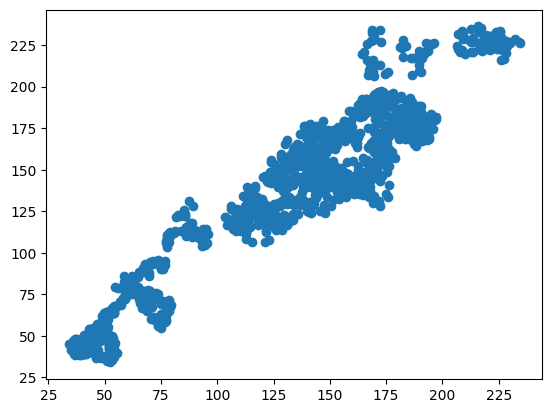

In [24]:
plt.scatter(df['t-50'], df['Adj Close'])

<Axes: xlabel='Lag', ylabel='Autocorrelation'>

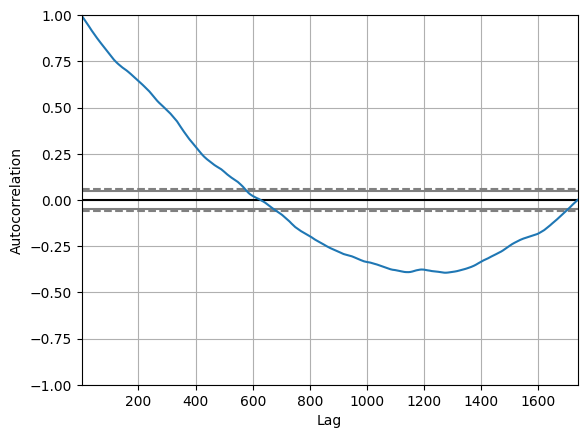

In [25]:
pd.plotting.autocorrelation_plot(df['Adj Close'])

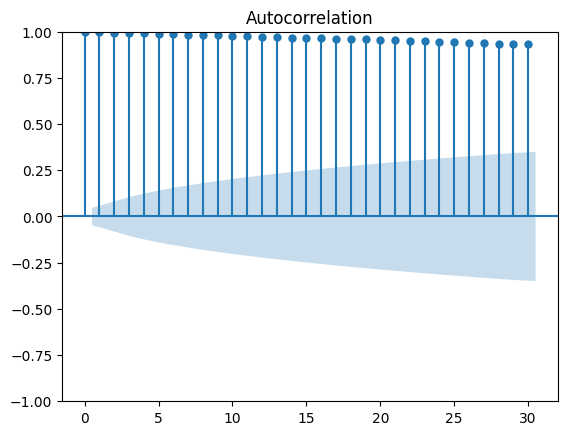

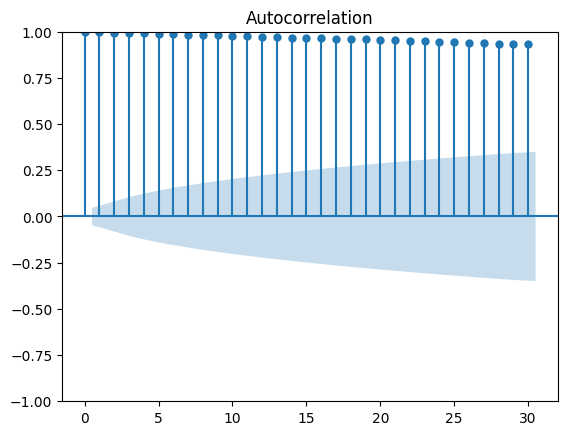

In [26]:
plot_acf(df['Adj Close'], lags=30)

In [27]:
# fit ARIMA model first

model = ARIMA(df['Adj Close'], order=(50,1,1))

/Users/sam/Library/Python/3.9/lib/python/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/sam/Library/Python/3.9/lib/python/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/sam/Library/Python/3.9/lib/python/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [28]:
fit = model.fit()

In [29]:
print(fit.summary())

                               SARIMAX Results                                
Dep. Variable:                   AAPL   No. Observations:                 1738
Model:                ARIMA(50, 1, 1)   Log Likelihood               -3875.303
Date:                Mon, 09 Dec 2024   AIC                           7854.606
Time:                        17:13:55   BIC                           8138.522
Sample:                             0   HQIC                          7959.599
                               - 1738                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.7508      0.299     -2.512      0.012      -1.337      -0.165
ar.L2         -0.0319      0.026     -1.215      0.224      -0.083       0.020
ar.L3         -0.0386      0.028     -1.377      0.1

In [30]:
forecast = fit.forecast(steps=30)

/Users/sam/Library/Python/3.9/lib/python/site-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Users/sam/Library/Python/3.9/lib/python/site-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


In [31]:
forecast.reset_index()

,index,predicted_mean
0,1738,235.713651
1,1739,234.651437
2,1740,234.556065
3,1741,234.335610
4,1742,234.677695
5,1743,234.367434
6,1744,234.721982
7,1745,234.831390
8,1746,234.590542
9,1747,233.921570


In [32]:
forecast_index = pd.date_range(start=df.index[-1] + pd.Timedelta(days=1), periods=30, freq='B')


In [33]:
forecast_df = pd.concat([pd.DataFrame(forecast_index), pd.DataFrame(forecast.reset_index())], axis=1)
forecast_df.drop('index', axis=1, inplace=True)
forecast_df.rename({0:'date'},axis=1, inplace=True)


In [34]:
forecast_df.set_index('date', inplace=True)
forecast_df

,predicted_mean
date,
2024-11-27,235.713651
2024-11-28,234.651437
2024-11-29,234.556065
2024-12-02,234.335610
2024-12-03,234.677695
2024-12-04,234.367434
2024-12-05,234.721982
2024-12-06,234.831390
2024-12-09,234.590542


In [35]:
df['Adj Close'].iloc[-30:]

Ticker,AAPL
Date,
2024-10-16,231.525269
2024-10-17,231.894867
2024-10-18,234.741730
2024-10-21,236.220108
2024-10-22,235.600800
2024-10-23,230.506393
2024-10-24,230.316620
2024-10-25,231.155685
2024-10-28,233.143494


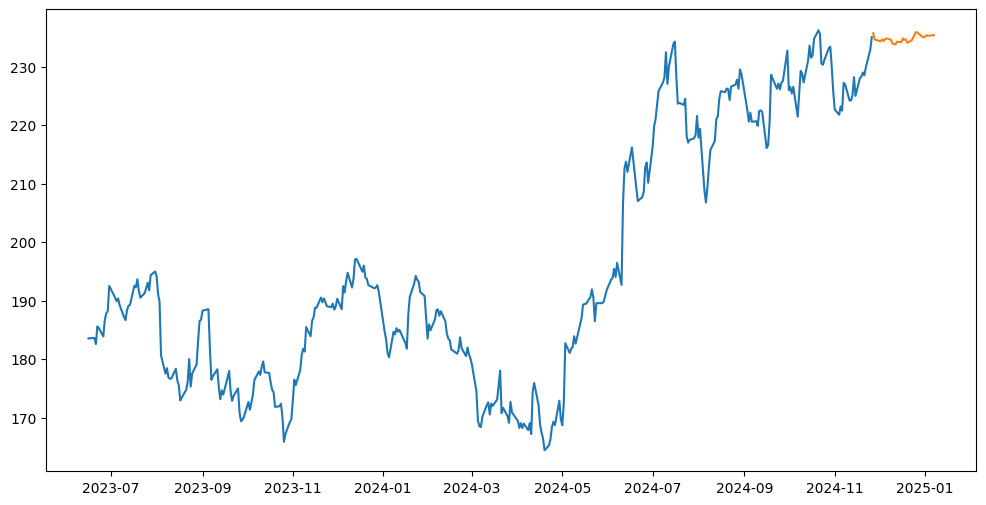

In [36]:
plt.figure(figsize=(12,6))
plt.plot(df['Adj Close'].iloc[-365:])
plt.plot(forecast_df)


In [37]:
df.rename({'price_diff':'t-1'}, axis=1,inplace=True)

/var/folders/t8/98kc315d6592z5nmcq76rt9h0000gn/T/ipykernel_15580/1087581616.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename({'price_diff':'t-1'}, axis=1,inplace=True)


In [38]:
df.drop('t-50', axis=1, inplace=True)

/var/folders/t8/98kc315d6592z5nmcq76rt9h0000gn/T/ipykernel_15580/1500505010.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop('t-50', axis=1, inplace=True)


In [39]:
df['t-3'] = df['Adj Close'].shift(3)

/var/folders/t8/98kc315d6592z5nmcq76rt9h0000gn/T/ipykernel_15580/253340229.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['t-3'] = df['Adj Close'].shift(3)


In [40]:
df

Price,Adj Close,t-1,t-2,t-3
Ticker,AAPL,,,
Date,,,,
2018-01-02,40.524345,NaN,NaN,NaN
2018-01-03,40.517292,40.524345,NaN,NaN
2018-01-04,40.705486,40.517292,40.524345,NaN
2018-01-05,41.168922,40.705486,40.517292,40.524345
2018-01-08,41.016022,41.168922,40.705486,40.517292
...,...,...,...,...
2024-11-20,229.000000,228.279999,228.020004,225.000000
2024-11-21,228.520004,229.000000,228.279999,228.020004


In [41]:
#train test split
train_size = int(0.8 * len(df))


In [42]:
train, test = df.iloc[:train_size], df.iloc[train_size:]

In [43]:
train

Price,Adj Close,t-1,t-2,t-3
Ticker,AAPL,,,
Date,,,,
2018-01-02,40.524345,NaN,NaN,NaN
2018-01-03,40.517292,40.524345,NaN,NaN
2018-01-04,40.705486,40.517292,40.524345,NaN
2018-01-05,41.168922,40.705486,40.517292,40.524345
2018-01-08,41.016022,41.168922,40.705486,40.517292
...,...,...,...,...
2023-07-06,190.366684,189.890305,191.011810,192.510452
2023-07-07,189.245178,190.366684,189.890305,191.011810


In [44]:
test

Price,Adj Close,t-1,t-2,t-3
Ticker,AAPL,,,
Date,,,,
2023-07-13,189.106232,188.342026,186.664764,187.190765
2023-07-14,189.255127,189.106232,188.342026,186.664764
2023-07-17,192.530289,189.255127,189.106232,188.342026
2023-07-18,192.272247,192.530289,189.255127,189.106232
2023-07-19,193.631958,192.272247,192.530289,189.255127
...,...,...,...,...
2024-11-20,229.000000,228.279999,228.020004,225.000000
2024-11-21,228.520004,229.000000,228.279999,228.020004


In [45]:
X_train = train[['t-1', 't-2', 't-3']]
y_train = train['Adj Close']
X_test = test[['t-1', 't-2', 't-3']]
y_test = test['Adj Close']

In [46]:
rf = RandomForestRegressor(n_estimators=100)
rf.fit(X_train, y_train)

/Users/sam/Library/Python/3.9/lib/python/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestRegressor()

In [47]:
y_pred = rf.predict(X_test)

In [48]:
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

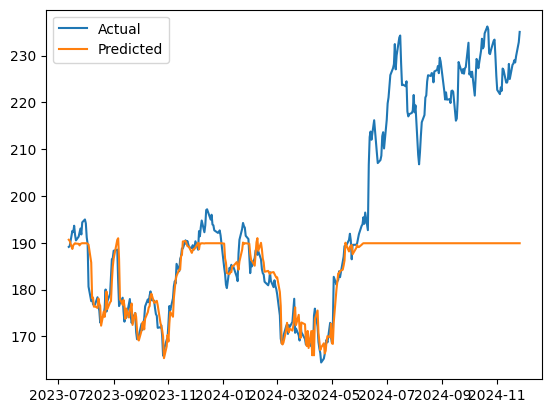

In [49]:
plt.plot(test.index, y_test, label='Actual')
plt.plot(test.index, y_pred, label='Predicted')
plt.legend()

In [50]:
arima_forecast = fit.forecast(steps = len(y_test))

/Users/sam/Library/Python/3.9/lib/python/site-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Users/sam/Library/Python/3.9/lib/python/site-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


In [51]:
arima_rmse = np.sqrt(mean_squared_error(y_test, arima_forecast))

In [52]:
arima_rmse

44.62321157607587

In [53]:
rmse

20.198332589579035